In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_regression,r_regression,mutual_info_regression, f_classif

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
absence=['na','-','I']
bokhol=pd.read_excel('basedonnees.xlsx',na_values=absence,parse_dates=True,index_col=[0])

In [3]:
bokhol.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105084 entries, 2021-01-01 00:05:00 to 2021-12-31 21:00:00
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   W2- Irradiance (W/m²)              105069 non-null  float64
 1   W3 - Irradiance (W/m²)             105060 non-null  float64
 2   W4 - Irradiance (W/m²)             105062 non-null  float64
 3    Temperature ambiante (°C)         105074 non-null  float64
 4    Vitesse du vent (m/s)             105077 non-null  float64
 5   Température module (°C)            104872 non-null  float64
 6   Production Centrale Meter 1 - (W)  104502 non-null  float64
dtypes: float64(7)
memory usage: 6.4 MB


In [4]:
bokhol=bokhol.dropna(axis=0)
bokhol.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

In [5]:
bokhol=bokhol.drop([bokhol.columns[1],bokhol.columns[2]],axis=1)
bokhol.head()

,W2- Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,
2021-01-01 00:05:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,21.9667,1.7416,25.9,0.0


In [6]:
X=bokhol.drop([bokhol.columns[4],bokhol.columns[2]],axis=1)
y=bokhol[['Production Centrale Meter 1 - (W)']]

In [7]:
seuil=12 # POUR 1H
X_train=X[12:]
y_train=y[12:]

X_teste=X[:12]
y_teste=y[:12]

print(X_train.shape)
print(X_teste.shape)
print("______________________________")
print(y_train.shape)
print(y_teste.shape)

(104226, 3)
(12, 3)
______________________________
(104226, 1)
(12, 1)


In [8]:
X_train.index

DatetimeIndex(['2021-01-01 01:05:00', '2021-01-01 01:10:00',
               '2021-01-01 01:15:00', '2021-01-01 01:20:00',
               '2021-01-01 01:25:00', '2021-01-01 01:30:00',
               '2021-01-01 01:35:00', '2021-01-01 01:40:00',
               '2021-01-01 01:45:00', '2021-01-01 01:50:00',
               ...
               '2021-12-31 20:15:00', '2021-12-31 20:20:00',
               '2021-12-31 20:25:00', '2021-12-31 20:30:00',
               '2021-12-31 20:35:00', '2021-12-31 20:40:00',
               '2021-12-31 20:45:00', '2021-12-31 20:50:00',
               '2021-12-31 20:55:00', '2021-12-31 21:00:00'],
              dtype='datetime64[ns]', name='Date (+00:00)', length=104226, freq=None)

### KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=10)
grid.fit(X_train,y_train)
modele4=grid.best_estimator_
print(f"score sur le train set:{modele4.score(X_train,y_train)}")
print(f"score sur le teste set:{modele4.score(X_teste,y_teste)}")
print(f"MSE_train:{np.sqrt(mean_squared_error(y_train,modele4.predict(X_train)))}")
print(f"MSE_train:{np.sqrt(mean_squared_error(y_teste,modele4.predict(X_teste)))}")

score sur le train set:0.8792914827941127
score sur le teste set:1.0
MSE_train:2096316.0230640965
MSE_train:0.0


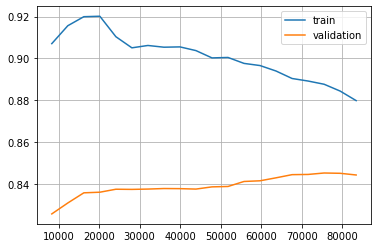

In [10]:
N,train_score,val_score=learning_curve(modele4,X_train,y_train,
                                       train_sizes=np.linspace(0.1,1.0,20),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend()

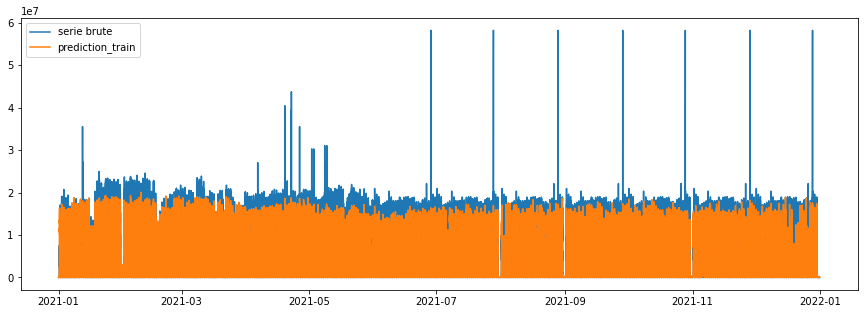

In [11]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='serie brute')
plt.plot(X_train.index,modele4.predict(X_train),label='prediction_train')
plt.legend()

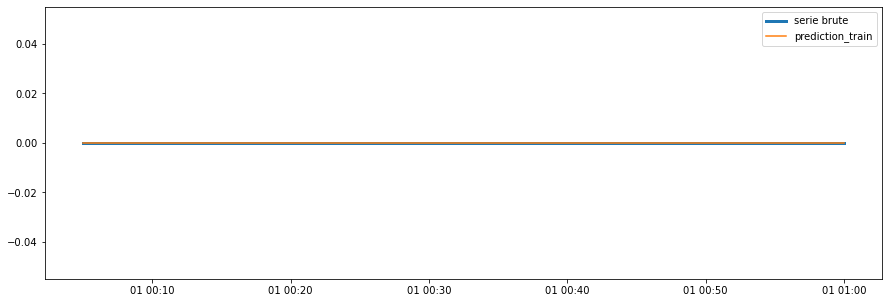

In [12]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='serie brute',lw=3)
plt.plot(X_teste.index,modele4.predict(X_teste),label='prediction_train')
plt.legend()

### arbres de descisions

In [13]:
"""# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal

plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(15,5))
plot_tree(tree, feature_names=X.columns)
plt.show()

print(r2_score(y_train, tree.predict(X_train)))
print(r2_score(y_teste, tree.predict(X_teste)))
"""

"# Liste des profondeurs maximales à tester\nmax_depths = range(1, 15)\n\n# Liste pour stocker les scores de validation croisée\ncv_scores = []\n\n# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée\nfor depth in max_depths:\n    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)\n    scores = cross_val_score(tree, X_train, y_train, cv=10)\n    cv_scores.append(np.mean(scores))\n\n# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal\n\nplt.plot(max_depths, cv_scores)\nplt.xlabel('Profondeur maximale de l'arbre')\nplt.ylabel('Score de validation croisée')\nplt.title('Validation croisée pour l'arbre de décision')\nplt.show()\n\nbest_depth = max_depths[np.argmax(cv_scores)]\nprint('La meilleure profondeur maximale est :', best_depth)\n\n# Construire l'arbre de décision avec la profondeur maximale choisie\ntree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)\ntree.fit(X_

### ensemble methode Adaboost

In [14]:
from sklearn.ensemble import BaggingRegressor
# Création du modèle
model = BaggingRegressor(random_state=42)
# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300],
    #'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_
# Sur l'ensemble d'entrainement
train_predictions = best_model.predict(X_train)
print("R2_Train:", r2_score(y_train, train_predictions))
# Sur l'ensemble de test
test_predictions = best_model.predict(X_teste)
print("R2_Test:", r2_score(y_teste, test_predictions))

Best Parameters:  {'n_estimators': 300}
R2_Train: 0.98179965887031
R2_Test: 1.0


In [15]:

"""
N,train_score,val_score=learning_curve(best_model,X_train,y_train,
                                       train_sizes=np.linspace(0.1,1.0,30),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend()
"""


"\nN,train_score,val_score=learning_curve(best_model,X_train,y_train,\n                                       train_sizes=np.linspace(0.1,1.0,30),cv=5)\nplt.plot(N,train_score.mean(axis=1),label='train')\nplt.plot(N,val_score.mean(axis=1),label='validation')\nplt.grid()\nplt.legend()\n"

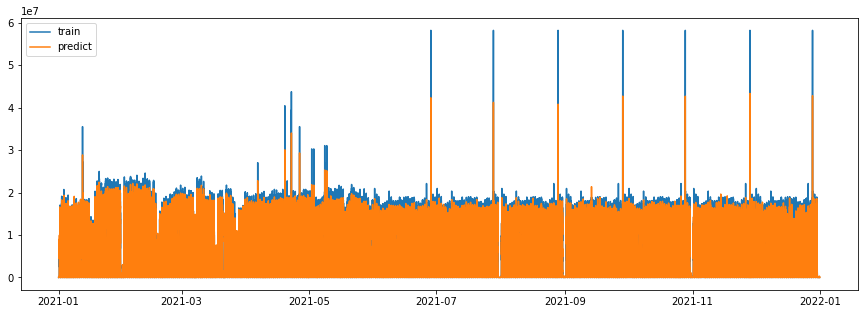

In [16]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='train')
plt.plot(X_train.index,best_model.predict(X_train),label='predict')
plt.legend()

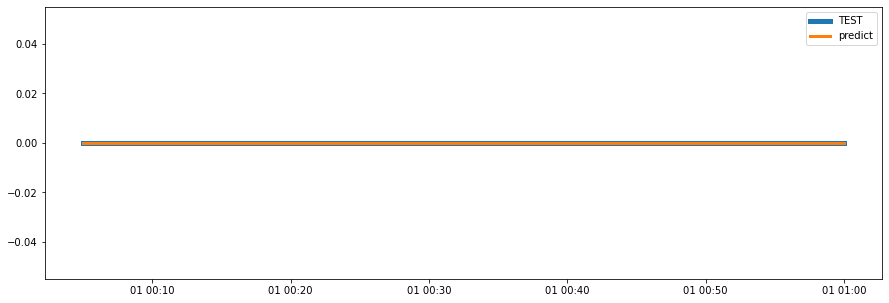

In [17]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='TEST',lw=5)
plt.plot(X_teste.index,best_model.predict(X_teste),label='predict',lw=3)
plt.legend()

### LINEAR MODEL

In [18]:
modele_1=LinearRegression()
modele_1.fit(X_train,y_train)
trat=KFold(10)#,shuffle=False, random_state=1)
#print(cross_val_score(modele_1,X_train,y_train,cv=trat).mean())

print(f"R2_train:{modele_1.score(X_train,y_train)}")
print(f"R2_teste:{modele_1.score(X_teste,y_teste)}")
print(f"MSE_TRAIN:{np.sqrt(mean_squared_error(y_train,modele_1.predict(X_train)))}")
print(f"MSE_TESTE:{np.sqrt(mean_squared_error(y_teste,modele_1.predict(X_teste)))}")

R2_train:0.8504104706793284
R2_teste:0.0
MSE_TRAIN:2333664.362728903
MSE_TESTE:395151.91981534567


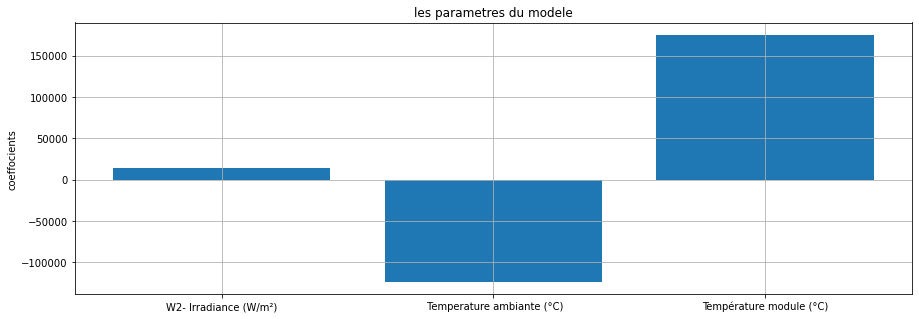

In [19]:
COEF=modele_1.coef_.tolist()[0]
plt.figure(figsize=(15,5))
plt.bar(x=X.columns,height=COEF)
plt.title('les parametres du modele')
plt.ylabel('coeffocients')
plt.grid()

In [20]:
modele_1.predict(X_teste).shape

(12, 1)

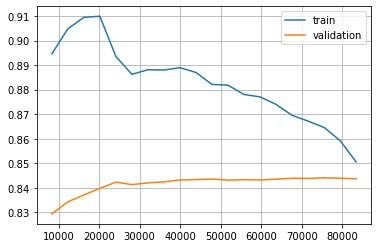

In [21]:
N,train_score,val_score=learning_curve(modele_1,X_train,y_train,
                                       train_sizes=np.linspace(0.1,1.0,20),cv=5)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.grid()
plt.legend()

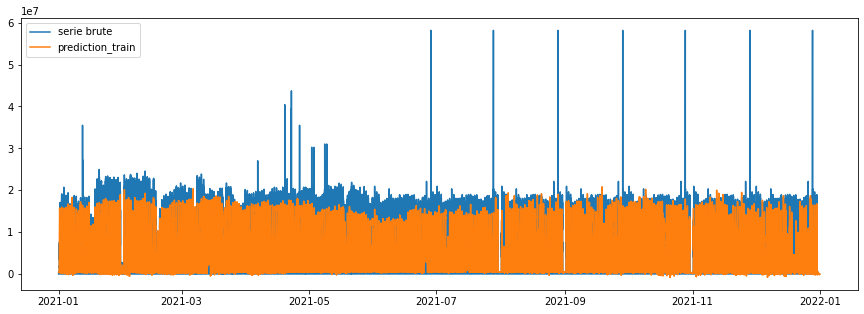

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y_train,label='serie brute')
plt.plot(X_train.index,modele_1.predict(X_train),label='prediction_train')
plt.legend()

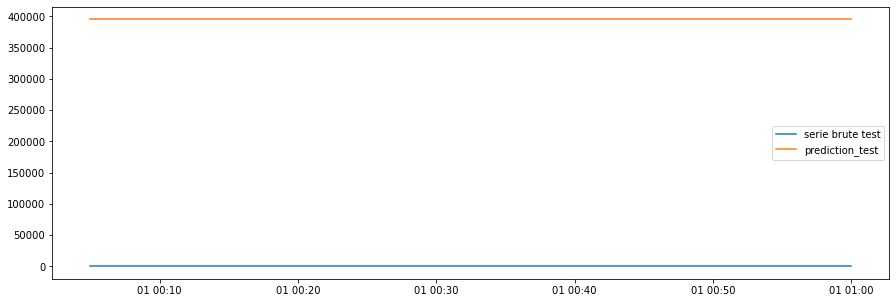

In [23]:
plt.figure(figsize=(15,5))
plt.plot(y_teste,label='serie brute test')
plt.plot(X_teste.index,modele_1.predict(X_teste),label='prediction_test')
plt.legend()

In [24]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 20), cv=10)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 20), cv=10)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 20), cv=10)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)
# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train, ridge_model.predict(X_train))
ridge_test_r2 = r2_score(y_teste, ridge_model.predict(X_teste))
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,ridge_model.predict(X_train)))
ridge_test_rmse = np.sqrt(mean_squared_error(y_teste, ridge_model.predict(X_teste)))

lasso_train_r2 = r2_score(y_train, lasso_model.predict(X_train))
lasso_test_r2 = r2_score(y_teste, lasso_model.predict(X_teste))
lasso_train_rmse = np.sqrt(mean_squared_error(y_train,lasso_model.predict(X_train)))
lasso_test_rmse = np.sqrt(mean_squared_error(y_teste,lasso_model.predict(X_teste)))

enet_train_r2 = r2_score(y_train, enet_model.predict(X_train))
enet_test_r2 = r2_score(y_teste, enet_model.predict(X_teste))
enet_train_rmse = np.sqrt(mean_squared_error(y_train,enet_model.predict(X_train)))
enet_test_rmse = np.sqrt(mean_squared_error(y_teste,enet_model.predict(X_teste)))
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,0.850364,0.0,2.334026e+06,386876.888034
1,Lasso,0.850410,0.0,2.333666e+06,394394.539033
2,ElasticNet,0.850358,0.0,2.334075e+06,386333.918885


### Reseau de neurone

In [25]:
import tensorflow as tf

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model.add(tf.keras.layers.Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])


In [34]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model1.add(tf.keras.layers.Dense(units=15,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model1.add(tf.keras.layers.Dense(units=1,activation='relu'))

model1.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                60        
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 316
Trainable params: 316
Non-trainable params: 0
_________________________________________________________________


In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
scal=MinMaxScaler()
X_train_scal=scal.fit_transform(X_train)
X_teste_scal=scal.fit_transform(X_teste)
y_train_scal=scal.fit_transform(y_train)
y_teste_scal=scal.fit_transform(y_teste)

In [28]:
model.fit(X_train_scal,y_train_scal,epochs=50)

Epoch 1/50
3258/3258 [==============================] - 8s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 2/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 3/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 4/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 5/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 6/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 7/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 8/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/50
3258/3258 [======

In [29]:
model.evaluate(X_teste_scal,y_teste_scal)

1/1 [==============================] - 0s 197ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [30]:
print(f'testR2:{r2_score(y_teste_scal,model.predict(X_teste_scal))}')
print(f'trainR2:{r2_score(y_train_scal,model.predict(X_train_scal))}')

1/1 [==============================] - 0s 117ms/step
testR2:1.0
3258/3258 [==============================] - 4s 1ms/step
trainR2:0.867100907142651


In [31]:
MSE_train=np.sqrt(mean_squared_error(scal.inverse_transform(y_train_scal),
                                     scal.inverse_transform(model.predict(X_train_scal))))
MSE_teste=np.sqrt(mean_squared_error(scal.inverse_transform(y_teste_scal),
                                     scal.inverse_transform(model.predict(X_teste_scal))))
print(f'mse train:{MSE_train}')
print(f'mse test:{MSE_teste}')

1/1 [==============================] - 0s 31ms/step
mse train:0.037809069497958904
mse test:0.0


3258/3258 [==============================] - 4s 1ms/step


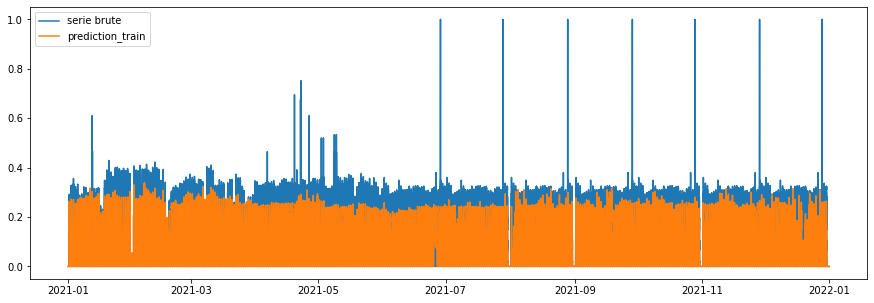

In [32]:
plt.figure(figsize=(15,5))
plt.plot(X_train.index,y_train_scal,label='serie brute')
plt.plot(X_train.index,model.predict(X_train_scal),label='prediction_train')
plt.legend()

1/1 [==============================] - 0s 21ms/step


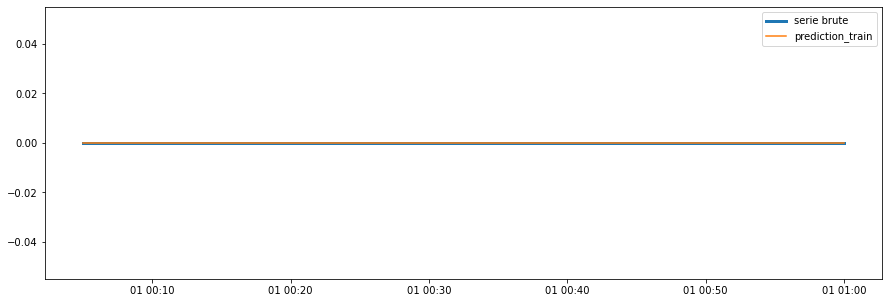

In [33]:
plt.figure(figsize=(15,5))
plt.plot(X_teste.index,y_teste_scal,label='serie brute',lw=3)
plt.plot(X_teste.index,model.predict(X_teste_scal),label='prediction_train')
plt.legend()

In [36]:
model1.fit(X_train_scal,y_train_scal,epochs=50)

Epoch 1/50
3258/3258 [==============================] - 9s 2ms/step - loss: 0.0017 - mse: 0.0017
Epoch 2/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 3/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 4/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 5/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 6/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 7/50
3258/3258 [==============================] - 7s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 8/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 9/50
3258/3258 [==============================] - 6s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 10/50
3258/3258 [==============================] - 5s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/50
3258/3258 [======

In [37]:
print(f'testR2:{r2_score(y_teste_scal,model1.predict(X_teste_scal))}')
print(f'trainR2:{r2_score(y_train_scal,model1.predict(X_train_scal))}')

1/1 [==============================] - 0s 106ms/step
testR2:1.0
3258/3258 [==============================] - 5s 1ms/step
trainR2:0.8672008885151075


Text(0.5, 1.0, 'La fonction gaussienne')

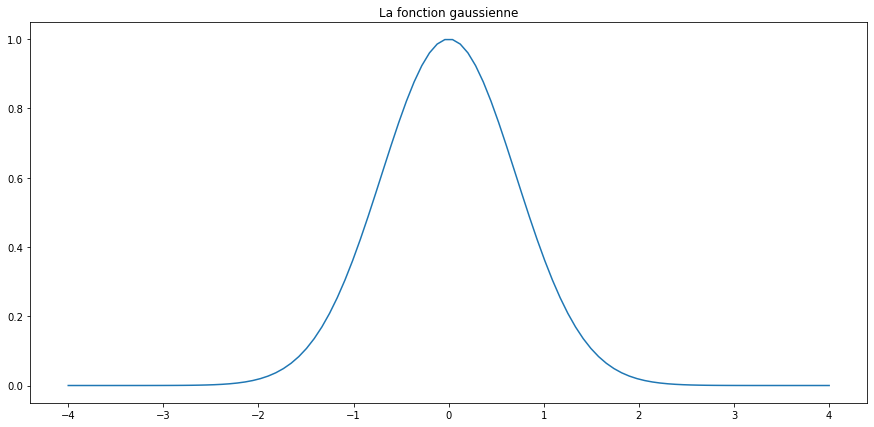

In [4]:
x=np.linspace(-4,4,100)
f=np.exp(-x**2)
plt.figure(figsize=(15,7))
plt.plot(x,f)
plt.title('La fonction gaussienne')